# Regression After Classification

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

from google.colab import drive
drive.mount('/content/drive')

sys.path.append("/content/drive/MyDrive/GSOC-NMR-project/Work/Notebooks")
from auxillary_functions import *
from polynomial_featextract import poly_featextract

Mounted at /content/drive


In [2]:
# import raw data and params.txt file
datadir_path = "/content/drive/MyDrive/GSOC-NMR-project/Work/Data/2021-06-21_classify_datagen_all_funcs"

rawdata = load_data(datadir_path)
params = load_params(datadir_path)
ker_integrals = load_wlist(datadir_path) # load wlist.txt file

# Stencil type : {'0' : 'Gaussian', '1' : 'Power Law', '2' : 'RKKY'}

Finished loading rawdata into numpy array
Finsihed loading parameters file
finished loading kernel-integrals file.


In [3]:
print(rawdata.shape)
offset = 150
shifted_data, center = get_window(rawdata,2/3,width=offset)
print("The Echo pulse occurs at timestep:",center)

# Rescaled data
rscl_data = shifted_data / np.max(shifted_data,axis=1,keepdims=True)

(10500, 943)
The Echo pulse occurs at timestep: 628


In [4]:
rscl_data_st0 = rscl_data[params['stencil_type'] == 0, :]
rscl_data_st1 = rscl_data[params['stencil_type'] == 1, :]
rscl_data_st2 = rscl_data[params['stencil_type'] == 2, :]

In [5]:
polyfeats0 = poly_featextract(rscl_data_st0, n_splits=[4,5,10], order_fits=[3,3,3], as_df=True)
polyfeats1 = poly_featextract(rscl_data_st1, n_splits=[4,5,10], order_fits=[3,3,3], as_df=True)
polyfeats2 = poly_featextract(rscl_data_st2, n_splits=[4,5,10], order_fits=[3,3,3], as_df=True)

In [130]:
params.head()

,αx,αy,αz,ξ,pow,Γ3,stencil_type,s,p,d,pulse90,pulse180
0,0.000140,0.000140,0.004113,2.038144,2.0,0.0,0.0,1.0,0.0,0.0,1.570796,3.141593
1,0.000288,0.000288,0.005442,1.698081,2.0,0.0,0.0,1.0,0.0,0.0,1.570796,3.141593
2,0.000948,0.000948,0.000869,2.757263,2.0,0.0,0.0,1.0,0.0,0.0,1.570796,3.141593
3,0.008380,0.008380,0.014527,1.236614,2.0,0.0,0.0,1.0,0.0,0.0,1.570796,3.141593
4,0.000710,0.000710,0.013350,1.144264,2.0,0.0,0.0,1.0,0.0,0.0,1.570796,3.141593


In [111]:
def get_best_args(data:np.ndarray, n_args:int):
    """Returns the top {n_args} for each row in the data 2d array"""
    get_args = [np.argpartition(data[i,:], -n_args)[-n_args:] for i in range(len(data))]
    return np.concatenate([np.sort(ts) for ts in get_args], axis=0)

In [119]:
c0 = get_best_args(rscl_data_st0,10)
c1 = get_best_args(rscl_data_st1,10)
c2 = get_best_args(rscl_data_st2,10)

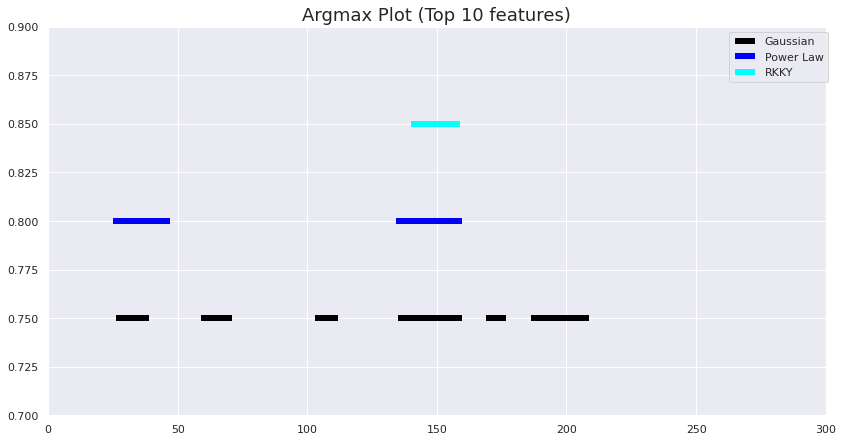

In [129]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.plot(c0,0.75*np.ones(len(c0)), '|', mew=20, color=[0,0,0])
ax.plot(c1,0.8*np.ones(len(c0)), '|', mew=20, color=[0,0,1])
ax.plot(c2,0.85*np.ones(len(c0)), '|', mew=20, color=[0,1,1])

plt.legend(["Gaussian","Power Law", "RKKY"], bbox_to_anchor=[1.01,1])
#plt.yticks(np.arange(0.6,1.4,10))
plt.title("Argmax Plot (Top 10 features)", fontsize=18)
plt.ylim(0.7,0.9)
plt.xlim(0,300)
plt.show()

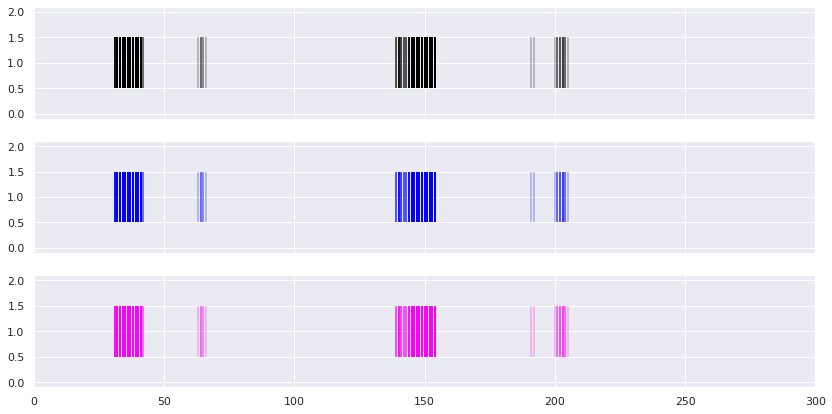

In [96]:
fig,axes = plt.subplots(3,1,figsize=(14,7), sharex=True, sharey=True)
axes[0].eventplot(c0,color=[0,0,0], alpha=0.3)
axes[1].eventplot(c1,color=[0,0,1], alpha=0.3)
axes[2].eventplot(c2,color=[1,0,1], alpha=0.3)
plt.xlim(0,300)

plt.show()